# Logistics Regression,Machine Learning

In [308]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix

In [383]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble,discriminant_analysis, gaussian_process

In [309]:
#Reading DataFrame.
Data=pd.read_csv('Desktop/EEG0.csv')
Data = Data[Data.Activity_Name!='Light Ambulatory']
Data.head(10)

,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Activity_Name
0,139559,45567,8773,17471,24624,6556,2584,11550,Stationary
1,444535,99703,5699,22056,43233,5919,5422,11393,Stationary
2,194551,135641,22018,21954,26301,6838,5853,18788,Stationary
3,44358,65511,4610,1958,3623,10555,5731,9016,Stationary
4,35560,14786,1089,4297,4020,1390,2699,3831,Stationary
5,102978,39628,1795,2808,4602,4356,1209,2812,Stationary
6,612375,100998,19267,18902,15198,21613,9529,12111,Stationary
7,100102,9309,7601,3599,2605,4976,1271,4491,Stationary
8,4043,21502,2852,929,3216,2895,1221,698,Stationary
9,1392195,201865,32314,19425,12570,10177,5614,4414,Stationary


In [310]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7080 entries, 0 to 8159
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0    Delta         7080 non-null   int64 
 1    Theta         7080 non-null   int64 
 2    Alpha1        7080 non-null   int64 
 3    Alpha2        7080 non-null   int64 
 4    Beta1         7080 non-null   int64 
 5    Beta2         7080 non-null   int64 
 6    Gamma1        7080 non-null   int64 
 7    Gamma2        7080 non-null   int64 
 8   Activity_Name  7080 non-null   object
dtypes: int64(8), object(1)
memory usage: 553.1+ KB


In [311]:
Data['Activity_Name'].unique()

array(['Stationary', 'Intense Ambulatory'], dtype=object)

# EDA-- Exploratory Data Analysis

In [312]:
#Data unique values
Data.nunique()

 Delta           6203
 Theta           6136
 Alpha1          5898
 Alpha2          5816
 Beta1           5830
 Beta2           5809
 Gamma1          5441
 Gamma2          4666
Activity_Name       2
dtype: int64

In [313]:
Data.isnull().sum()

 Delta           0
 Theta           0
 Alpha1          0
 Alpha2          0
 Beta1           0
 Beta2           0
 Gamma1          0
 Gamma2          0
Activity_Name    0
dtype: int64

In [314]:
Data.dropna(inplace=True)

In [315]:
Data.isnull().sum()

 Delta           0
 Theta           0
 Alpha1          0
 Alpha2          0
 Beta1           0
 Beta2           0
 Gamma1          0
 Gamma2          0
Activity_Name    0
dtype: int64

In [316]:
LabelEncoder = preprocessing.LabelEncoder()

In [317]:
Data['Activity_Name'] = LabelEncoder.fit_transform(Data['Activity_Name'].astype(str))

In [318]:
X = Data.drop(['Activity_Name'],axis=1)
Y = Data['Activity_Name']
Data['Activity_Name'].unique()

array([1, 0])

<AxesSubplot:>

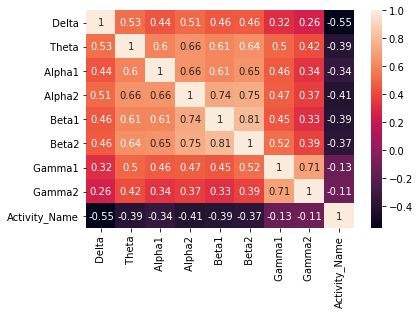

In [319]:
corelation=Data.corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

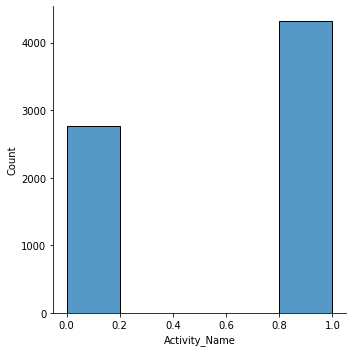

In [320]:
sns.displot(Data['Activity_Name'],bins=5)

In [321]:
m=len(X)
m

7080

In [322]:
X.shape

(7080, 8)

In [323]:
#min_max_scaler = preprocessing.MinMaxScaler()
#X = min_max_scaler.fit_transform(X)

In [324]:
standard_scaler = preprocessing.StandardScaler()
X = standard_scaler.fit_transform(X)

# Independent Variable X

In [325]:
X

array([[-0.58991066, -0.38237424, -0.40595261, ..., -0.40084268,
        -0.58687875,  0.52077846],
       [-0.10156177, -0.14839323, -0.44578682, ..., -0.41053946,
        -0.43899981,  0.50649347],
       [-0.50185362,  0.00693427, -0.23431819, ..., -0.39654992,
        -0.41654181,  1.17934362],
       ...,
       [-0.6962638 , -0.39399635, -0.3572937 , ..., -0.35284591,
        -0.64258086, -0.38845637],
       [-0.77756988, -0.54961343, -0.3455404 , ..., -0.39081101,
        -0.47396344, -0.05389654],
       [-0.81338228, -0.5793192 , -0.51963692, ..., -0.50064187,
        -0.72152258, -0.5301234 ]])

# Dependent Variable Y

In [326]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
7075    1
7076    1
7077    1
7078    1
8159    1
Name: Activity_Name, Length: 7080, dtype: int32

In [327]:
Model=LogisticRegression()

In [328]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7080 entries, 0 to 8159
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0    Delta         7080 non-null   int64
 1    Theta         7080 non-null   int64
 2    Alpha1        7080 non-null   int64
 3    Alpha2        7080 non-null   int64
 4    Beta1         7080 non-null   int64
 5    Beta2         7080 non-null   int64
 6    Gamma1        7080 non-null   int64
 7    Gamma2        7080 non-null   int64
 8   Activity_Name  7080 non-null   int32
dtypes: int32(1), int64(8)
memory usage: 525.5 KB


<AxesSubplot:>

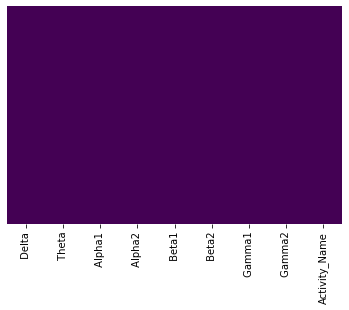

In [329]:
sns.heatmap(Data.isnull(),yticklabels=False,cmap='viridis',cbar=False)

<AxesSubplot:>

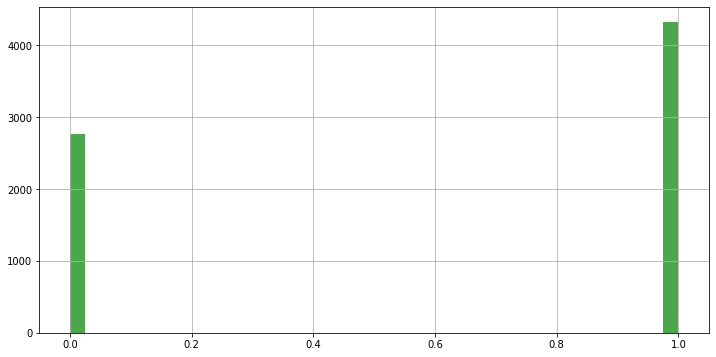

In [330]:
Data['Activity_Name'].hist(bins=40,color="green",alpha=0.7,figsize=(12,6))

c:\users\grace\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


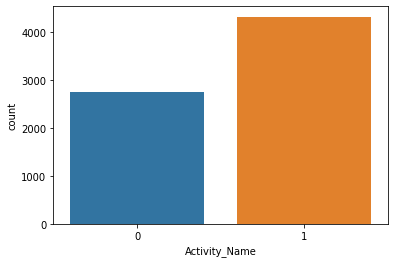

In [331]:
sns.countplot(Data['Activity_Name'],label="count")
plt.show()

In [332]:
from matplotlib import cm

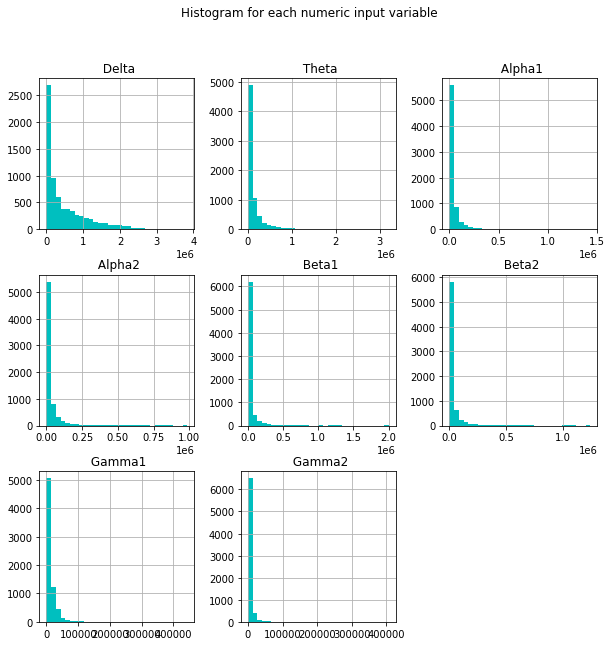

In [333]:
import pylab as pl

# To create a histogram, we will use pandas hist() method.
Data.drop('Activity_Name', axis=1).hist(bins=30, figsize=(10,10), color = "c")
plt.suptitle("Histogram for each numeric input variable")
plt.savefig('Data_histogram')
plt.show()

In [334]:
np.any(np.isnan(X))

False

In [335]:
np.all(np.isfinite(X))

True

In [336]:
X.shape

(7080, 8)

In [337]:
Y.shape

(7080,)

In [338]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [339]:
fitting=Model.fit(X_train,y_train)

In [340]:
Y_prediction=Model.predict(X_test)

In [341]:
Y_prediction

array([1, 0, 0, ..., 1, 1, 1])

# Accuracy of Model=Logistic Regression

In [342]:
acc_score = round(accuracy_score(y_test, Y_prediction)*100,2)
print(acc_score,'% Accuracy')

84.39 % Accuracy


# Classification Report

In [343]:
from sklearn.metrics import classification_report

In [344]:
print(classification_report(y_test,Y_prediction))

              precision    recall  f1-score   support

           0       0.87      0.69      0.76       524
           1       0.84      0.94      0.88       892

    accuracy                           0.84      1416
   macro avg       0.85      0.81      0.82      1416
weighted avg       0.85      0.84      0.84      1416



# Support Vector Machine, SVM

In [345]:
from sklearn.model_selection import train_test_split

In [346]:
from sklearn import svm

In [347]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [348]:
X_train

array([[-0.22833111, -0.33321471, -0.36572964, ..., -0.11272504,
        -0.15553912,  0.11533961],
       [ 0.03154379,  1.27907419, -0.02099649, ..., -0.27747895,
         0.38949742, -0.01004072],
       [-0.718957  , -0.29007587, -0.14175611, ..., -0.33246288,
        -0.44697214,  0.65862402],
       ...,
       [-0.72606183, -0.46003366, -0.44709562, ..., -0.28501412,
        -0.11176946,  0.1487319 ],
       [-0.66743774, -0.52262626, -0.27997074, ..., -0.45130551,
        -0.582606  , -0.34041515],
       [ 3.25525237,  0.16349357, -0.22961428, ..., -0.25607601,
        -0.27783365, -0.08455921]])

In [349]:
y_train

1478    1
1202    1
224     1
4587    0
6076    1
       ..
4079    1
6246    1
433     1
5514    1
663     1
Name: Activity_Name, Length: 5664, dtype: int32

In [350]:
model=svm.SVC()

# Hyperparameter tunning-Grid Search 

In [351]:
from sklearn.model_selection import GridSearchCV

In [352]:
parameters = {'kernel':('linear', 'rbf'), 'C':[10, 20,30,40,50]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train,y_train)
GridSearchCV(estimator=svc,
             param_grid={'C': [10, 20,30,40,50], 'kernel': ('linear', 'rbf')},cv=5,return_train_score=False)
#clf.cv_results_

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10, 20, 30, 40, 50],
                         'kernel': ('linear', 'rbf')})

In [353]:
df=pd.DataFrame(clf.cv_results_)
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,linear,0.854697
1,10,rbf,0.888772
2,20,linear,0.854697
3,20,rbf,0.889831
4,30,linear,0.854697
5,30,rbf,0.889479
6,40,linear,0.854697
7,40,rbf,0.889478
8,50,linear,0.854521
9,50,rbf,0.890007


In [354]:
#dir(clf)

In [355]:
clf.best_score_

0.8900074538655621

In [356]:
clf.best_params_

{'C': 50, 'kernel': 'rbf'}

In [357]:
model.fit(X_train,y_train)

SVC()

In [358]:
prediction=model.predict(X_test)
prediction

array([0, 1, 1, ..., 1, 1, 1])

In [359]:
y_test

3150    0
6455    1
3363    1
4334    0
580     1
       ..
3067    0
3224    0
553     1
2002    0
6213    1
Name: Activity_Name, Length: 1416, dtype: int32

# Accuracy of Model SVM=Support Vector Machine

In [360]:
acc_score = round(accuracy_score(y_test, prediction)*100,2)
print(acc_score,'% Accuracy')

87.5 % Accuracy


In [361]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       540
           1       0.87      0.93      0.90       876

    accuracy                           0.88      1416
   macro avg       0.88      0.86      0.86      1416
weighted avg       0.88      0.88      0.87      1416



# K-Nearest-Neighbour, Machine Learning

In [362]:
from sklearn.neighbors import KNeighborsClassifier

In [363]:
KNN=KNeighborsClassifier(n_neighbors=5)

In [364]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

# Accuracy on training Data

In [365]:
KNN.score(X_train,y_train)*100

91.0840395480226

# Accuracy on Testing Data

In [366]:
KNN.score(X_test,y_test)*100

87.5

In [367]:
prediction=model.predict(X_test)
prediction

array([0, 1, 1, ..., 1, 1, 1])

In [368]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       540
           1       0.87      0.93      0.90       876

    accuracy                           0.88      1416
   macro avg       0.88      0.86      0.86      1416
weighted avg       0.88      0.88      0.87      1416



# Navie Bayes, Machine Learning Model

In [369]:
from sklearn.naive_bayes import GaussianNB

In [370]:
gnb = GaussianNB()

In [371]:
# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [372]:
y_pred = gnb.predict(X_test)

y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [373]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       540
           1       0.87      0.93      0.90       876

    accuracy                           0.88      1416
   macro avg       0.88      0.86      0.86      1416
weighted avg       0.88      0.88      0.87      1416



# Accuracy Score

In [374]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score: 79.5904


In [375]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[292, 248],
       [ 41, 835]], dtype=int64)

In [376]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[292 248]
 [ 41 835]]

True Positives(TP) =  292

True Negatives(TN) =  835

False Positives(FP) =  248

False Negatives(FN) =  41


In [ ]:
#Roc and AUC 

In [391]:
MLA = [
   

    #Gaussian Processes
    
    #GLM
    linear_model.LogisticRegressionCV(),
    
   
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    svm.LinearSVC(),

    
    ]

In [392]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)





    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

c:\users\grace\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission,MLA Recall,MLA AUC
2,KNeighborsClassifier,0.9108,0.8750,0.883644,0.918950,0.861327
0,LogisticRegressionCV,0.8501,0.8347,0.832988,0.916667,0.809259
3,LinearSVC,0.8483,0.8326,0.825025,0.925799,0.803640
1,GaussianNB,0.7811,0.7959,0.771006,0.953196,0.746969


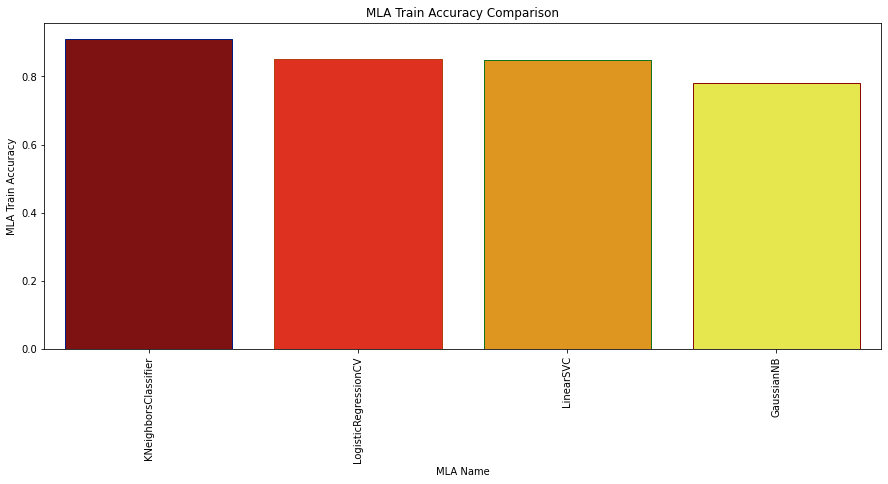

In [393]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

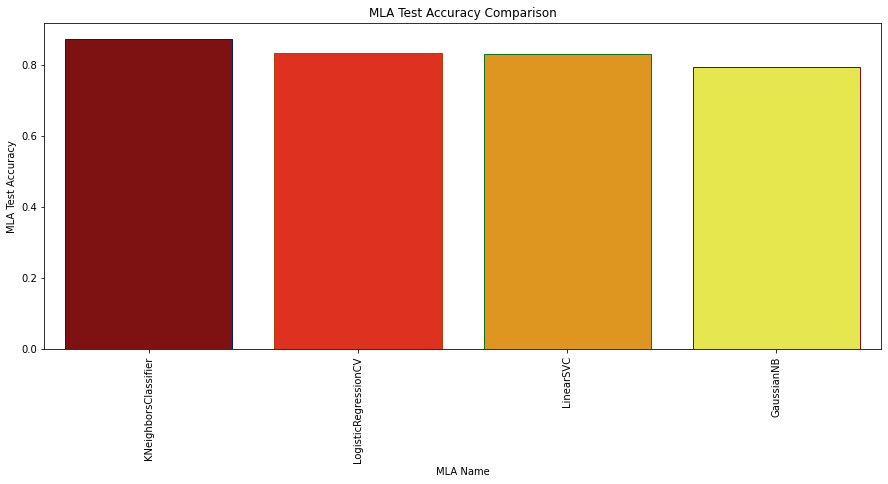

In [394]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()